# TEXT ANALYTICS GROUP ASSIGNMENT #2

#### Group Members: Brooks Beckelman, Zack Bilderback, Dallas Griffin, Estevan Gonzalez, Sean Kessel, Davis Townsend

In [6]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

import seaborn as sns

import sklearn
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

Populating the interactive namespace from numpy and matplotlib


In [7]:
yelp = pd.read_csv('YelpData.csv')

In [10]:
# Convert rating to high (4,5) or low (1,2,3)
yelp['rating'] = np.where(yelp['stars'] >= 4, 'high','low')
yelp.head(1)

,stars,votes_cool,votes_funny,votes_useful,Cheap,Moderate,Expensive,VeryExpensive,American,Chinese,...,Indian,Italian,Greek,Mediterranean,Mexican,Thai,Vietnamese,Others,Review,rating
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,This location is out of business. I drove by i...,low


## Task A: Numeric Data Only

To assess the predictive power of the numerical data, we will isolate it from the actual reviews and build a few different models. The accuracy of these models compared to a base case (predicting all reviews to have a 'high' rating) will give us a sense of how predictive this data is. 

In [4]:
# Split data into train and test sets
train, test = train_test_split(yelp, test_size=0.25, random_state=123)

x_train = train.drop(['stars', 'Review', 'rating'], axis=1)
y_train = train['rating']

x_test = test.drop(['stars', 'Review', 'rating'], axis=1)
y_test = test['rating']

### Logistic Regression

In [47]:
logreg = linear_model.LogisticRegression()
logreg_classifier = logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)

In [58]:
print 'LOGISTIC REGRESSION: '
print 'Precision:' + str(metrics.precision_score(y_test, logreg_predict, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_test, logreg_predict, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_test, logreg_predict))

LOGISTIC REGRESSION: 
Precision:0.689127738735
Recall: 0.978286384977
Accuracy: 0.6844


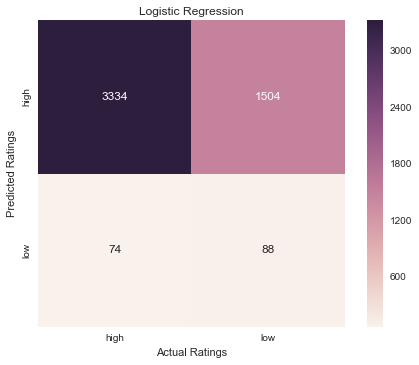

In [22]:
#Fancy boy confusion matrix
mat = metrics.confusion_matrix(y_test, logreg_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_test), yticklabels=unique(logreg_predict))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Logistic Regression')

### KNN

In [7]:
k_range = range(1,101)
accuracies = []
for k in k_range:
    if k % 10 == 0:
        print 'Performing classifier', k
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_classifier = knn.fit(x_train, y_train)
    knn_accuracy = knn.score(x_test, y_test)
    accuracies.append(knn_accuracy)


Performing classifier 10
Performing classifier 20
Performing classifier 30
Performing classifier 40
Performing classifier 50
Performing classifier 60
Performing classifier 70
Performing classifier 80
Performing classifier 90
Performing classifier 100


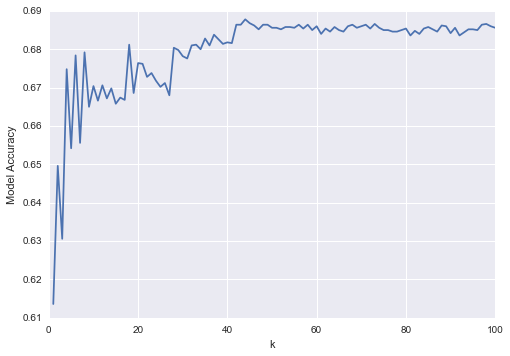

In [8]:
plot(k_range, accuracies)
xlabel('k')
ylabel('Model Accuracy')

In [49]:
s_accuracies = Series(accuracies)

k = s_accuracies.idxmax() + 1
knn = KNeighborsClassifier(n_neighbors=k)
knn_classifier = knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)

In [57]:
print 'K-NEAREST NEIGHBORS:'
print 'Precision:' + str(metrics.precision_score(y_test, knn_predict, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_test, knn_predict, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_test, knn_predict))

K-NEAREST NEIGHBORS:
Precision:0.692998955068
Recall: 0.973004694836
Accuracy: 0.6878


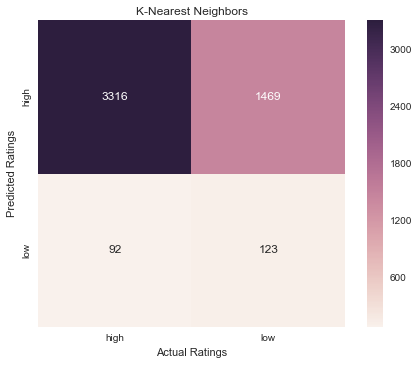

In [24]:
#Fancy boy confusion matrix
mat = metrics.confusion_matrix(y_test, knn_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_test), yticklabels=unique(knn_predict))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('K-Nearest Neighbors')

### Naive Bayes

In [8]:
mnb = MultinomialNB()
mnb_classifier = mnb.fit(x_train, y_train)
mnb_predict = mnb.predict(x_test)

In [55]:
print 'MULTINOMIAL NAIVE BAYES:'
print 'Precision:' + str(metrics.precision_score(y_test, mnb_predict, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_test, mnb_predict, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_test, mnb_predict))

MULTINOMIAL NAIVE BAYES:
Precision:0.682055399438
Recall: 0.9970657277
Accuracy: 0.6812


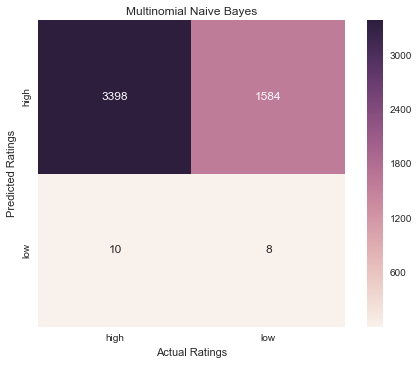

In [26]:
#Fancy boy confusion matrix
mat = metrics.confusion_matrix(y_test, mnb_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_test), yticklabels=unique(mnb_predict))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Multinomial Naive Bayes')

### Summary

To get a feel for the classification power of the numeric data, we ran a logistic regression, a k-nearest neighbors, and a multinomial naive bayes classifier. With all three models, we saw similar results with an accuracy of a little over 68%. The base case of predicting every review to have a positive rating has about a 68% accuracy as well. Therefore, it appears that not much predictive power is obtained from the numerical data, and it appears that these models are overpredicting the likelihood of a 'high' rating (4 or 5).

## Task B: Reviews (Text Data) Only

Next, we will isolate the reviews and use them alone to predict the class of ratings. Comparing the results will give us an idea of the predictive power of the text data relative to the predictive power of the numerical data.

In [6]:
sample = yelp.sample(10000, random_state=321)

# Split sample into train and test sets
trainB, testB = train_test_split(sample, test_size=0.25, random_state=123)

x_trainB = trainB['Review']
y_trainB = trainB['rating']

x_testB = testB['Review']
y_testB = testB['rating']

In [7]:
# Create matrix of token counts from reviews
vectorizer = CountVectorizer(analyzer = 'word', tokenizer= None, preprocessor = None, 
                             stop_words = None, max_features = None)

x_trainB = vectorizer.fit_transform(x_trainB)
x_testB = vectorizer.transform(x_testB)

### Naive Bayes

In [13]:
# Run Naive Bayes Classifier
mnb_classifierB = MultinomialNB().fit(x_trainB, y_trainB)

mnb_predictB = mnb_classifierB.predict(x_testB)

In [14]:
print 'Precision:' + str(metrics.precision_score(y_testB, mnb_predictB, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_testB, mnb_predictB, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_testB, mnb_predictB))

Precision:0.857612267251
Recall: 0.907826086957
Accuracy: 0.8324


C:\Users\brook\Anaconda2\lib\site-packages\seaborn\matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


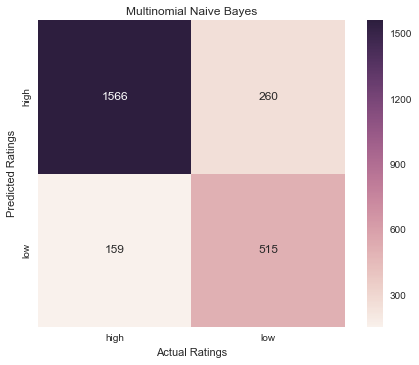

In [15]:
#Fancy boy confusion matrix
mat = metrics.confusion_matrix(y_testB, mnb_predictB)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_testB), yticklabels=unique(mnb_predictB))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Multinomial Naive Bayes')

### Logistic Regression

In [8]:
# Run Logistic Regression Classifier
logreg_classifierB = linear_model.LogisticRegression().fit(x_trainB, y_trainB)

logreg_predictB = logreg_classifierB.predict(x_testB)

In [9]:
print 'Precision:' + str(metrics.precision_score(y_testB, logreg_predictB, average = 'binary', pos_label='high'))
print 'Recall: ' + str(metrics.recall_score(y_testB, logreg_predictB, average = 'binary', pos_label='high'))
print 'Accuracy: ' + str(metrics.accuracy_score(y_testB, logreg_predictB))

Precision:0.863508178229
Recall: 0.887536231884
Accuracy: 0.8256


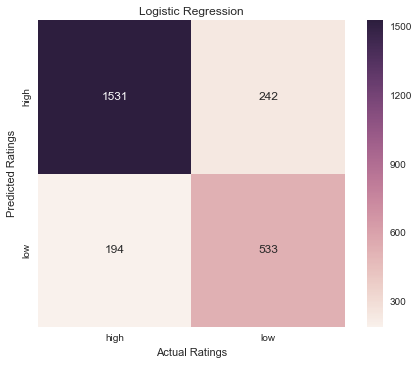

In [11]:
#Fancy boy confusion matrix
mat = metrics.confusion_matrix(y_testB, logreg_predictB)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, 
            xticklabels=unique(y_testB), yticklabels=unique(logreg_predictB))
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Logistic Regression')

### Summary

For the text data, we fit a multinomial naive bayes model and a logistic regression model to the same training set that was used for Part A. The only difference was that we used the text data from the reviews rather than the numerical data as the predictors. The accuracies of these models on the test data were far superior to those that we saw from the numerical data. Both models had accuracies of over 82%, compared to the 68% that we saw previously. This is also significantly higher than the accuracy of the base case, indicating that there is strong predictive power in the text data.

## Task C: Numeric and Text Data

In [71]:
x_trainC = trainB.drop(['stars', 'rating'], axis=1)
y_trainC = trainB['rating']

x_testC = testB.drop(['stars', 'rating'], axis=1)
y_testC = testB['rating']

## Task D: Unsupervised Sentiment Analysis

In [3]:
ss = pd.read_csv('YelpNoHeader+results.csv', header = None)
ss.head(1)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,2,2,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,1,CLOSED This JB s locati...,2,-2


In [4]:
ss['rating'] = np.where(ss[0] >= 4, 'high','low')

In [5]:
train, test = train_test_split(ss, test_size=0.25, random_state=123)

x_train = train[21].reshape(-1,1)
y_train = train['rating'].reshape(-1,1)

x_test = test[21].reshape(-1,1)
y_test = test['rating'].reshape(-1,1)

In [6]:
logreg = linear_model.LogisticRegression()
logreg_classifier = logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_testAccuracy = logreg.score(x_test, y_test)

print 'Logistic Regression Accuracy:', logreg_testAccuracy

Logistic Regression Accuracy: 0.7002


C:\Users\egonz\Anaconda2\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Task E: PMI Approach

In [20]:
import nltk
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.util import bigrams

yelp_pmi = yelp[['rating','Review']].sample(500)

# Tokenize all job descriptions from sample
yelp_pmi['tokenized'] = yelp_pmi['Review'].apply(lambda row: word_tokenize(row.decode('utf-8').strip()))
yelp_pmi['combined_bigram'] = yelp_pmi['tokenized'].apply(lambda row: list(bigrams(pos_tag(row))))

yelp_pmi.head()

,rating,Review,tokenized,combined_bigram
2311,high,I love this place! I lived in Phoenix for 15 y...,"[I, love, this, place, !, I, lived, in, Phoeni...","[((I, PRP), (love, VBP)), ((love, VBP), (this,..."
15256,high,Ticoz is a fantastic neighborhood restaurant/b...,"[Ticoz, is, a, fantastic, neighborhood, restau...","[((Ticoz, NNP), (is, VBZ)), ((is, VBZ), (a, DT..."
1618,low,the sushi is not worth it. it just tastes old ...,"[the, sushi, is, not, worth, it, ., it, just, ...","[((the, DT), (sushi, NN)), ((sushi, NN), (is, ..."
970,high,I just ate at Tommy V s (opened Friday Septem...,"[I, just, ate, at, Tommy, V, s, (, opened, Fri...","[((I, PRP), (just, RB)), ((just, RB), (ate, VB..."
14872,low,like your scrambled eggs toasty brown dry and...,"[like, your, scrambled, eggs, toasty, brown, d...","[((like, IN), (your, PRP$)), ((your, PRP$), (s..."


In [12]:
pos_filter = [['JJ','NN'],['JJ','NNS'],['RB','JJ'],['RBR','JJ'],['RBS','JJ'],['JJ','JJ'],['NN','JJ'],['NNS','JJ'],['RB','VB']]
positive_words = ['excellent']
negative_words = ['poor']

In [19]:
yelp_pmi_pos = yelp_pmi.apply(lambda x: pd.Series(x['combined_bigram']),axis=1).stack().reset_index(level=1, drop=True)
yelp_pmi_pos.name = 'combined_bigram'

yelp_pmi_pos = yelp_pmi.drop('combined_bigram', axis=1).join(yelp_pmi_pos)

yelp_pmi_pos['bigram'] = yelp_pmi_pos['combined_bigram'].apply(lambda row: [x[0] for x in row])
yelp_pmi_pos['pos_bigram'] = yelp_pmi_pos['combined_bigram'].apply(lambda row: [x[1] for x in row])

yelp_pmi_pos.head()

,rating,Review,tokenized_strip,tokenized,combined_bigram,bigram,pos_bigram
3,low,Whenever I offer to take my mom out to lunch s...,Whenever I offer to take my mom out to lunch s...,"[Whenever, I, offer, to, take, my, mom, out, t...","((Whenever, WRB), (I, PRP))","[Whenever, I]","[WRB, PRP]"
3,low,Whenever I offer to take my mom out to lunch s...,Whenever I offer to take my mom out to lunch s...,"[Whenever, I, offer, to, take, my, mom, out, t...","((I, PRP), (offer, VBP))","[I, offer]","[PRP, VBP]"
3,low,Whenever I offer to take my mom out to lunch s...,Whenever I offer to take my mom out to lunch s...,"[Whenever, I, offer, to, take, my, mom, out, t...","((offer, VBP), (to, TO))","[offer, to]","[VBP, TO]"
3,low,Whenever I offer to take my mom out to lunch s...,Whenever I offer to take my mom out to lunch s...,"[Whenever, I, offer, to, take, my, mom, out, t...","((to, TO), (take, VB))","[to, take]","[TO, VB]"
3,low,Whenever I offer to take my mom out to lunch s...,Whenever I offer to take my mom out to lunch s...,"[Whenever, I, offer, to, take, my, mom, out, t...","((take, VB), (my, PRP$))","[take, my]","[VB, PRP$]"


Remaining Steps:

    1.) Filter out rows where pos_bigram does not match record in pos_filter list
    2.) Calculate Semantic Orientation for each phrase
    3.) Roll-up the average semantic orientation by ID
    4.) Classify positives as "high", negatives as "low"
    5.) Measure accuracy

Extra:

    1.) Potentially add additional positive/negative words to improve performance

In [56]:
#Calculate Semantic Orientation for all Phrases

PhraseScores = yelp_pmi_pos[yelp_pmi_pos['pos_bigram'].isin(pos_filter)]

def SemanticOrientation(phrase,phrase_set2):
    for phrase in phrase_set1:
        

,rating,Review,tokenized_strip,tokenized,pos,bigram,pos_bigram
8329,high,Went for a date here with my GF. Food was good...,Went for a date here with my GF. Food was good...,"[Went, for, a, date, here, with, my, GF, ., Fo...","(Went, NN)","[(Went, for), (for, a), (a, date), (date, here...","[(NN, IN), (IN, DT), (DT, NN), (NN, RB), (RB, ..."
8329,high,Went for a date here with my GF. Food was good...,Went for a date here with my GF. Food was good...,"[Went, for, a, date, here, with, my, GF, ., Fo...","(for, IN)","[(Went, for), (for, a), (a, date), (date, here...","[(NN, IN), (IN, DT), (DT, NN), (NN, RB), (RB, ..."
8329,high,Went for a date here with my GF. Food was good...,Went for a date here with my GF. Food was good...,"[Went, for, a, date, here, with, my, GF, ., Fo...","(a, DT)","[(Went, for), (for, a), (a, date), (date, here...","[(NN, IN), (IN, DT), (DT, NN), (NN, RB), (RB, ..."
8329,high,Went for a date here with my GF. Food was good...,Went for a date here with my GF. Food was good...,"[Went, for, a, date, here, with, my, GF, ., Fo...","(date, NN)","[(Went, for), (for, a), (a, date), (date, here...","[(NN, IN), (IN, DT), (DT, NN), (NN, RB), (RB, ..."
8329,high,Went for a date here with my GF. Food was good...,Went for a date here with my GF. Food was good...,"[Went, for, a, date, here, with, my, GF, ., Fo...","(here, RB)","[(Went, for), (for, a), (a, date), (date, here...","[(NN, IN), (IN, DT), (DT, NN), (NN, RB), (RB, ..."
8329,high,Went for a date here with my GF. Food was good...,Went for a date here with my GF. Food was good...,"[Went, for, a, date, here, with, my, GF, ., Fo...","(with, IN)","[(Went, for), (for, a), (a, date), (date, here...","[(NN, IN), (IN, DT), (DT, NN), (NN, RB), (RB, ..."
8329,high,Went for a date here with my GF. Food was good...,Went for a date here with my GF. Food was good...,"[Went, for, a, date, here, with, my, GF, ., Fo...","(my, PRP$)","[(Went, for), (for, a), (a, date), (date, here...","[(NN, IN), (IN, DT), (DT, NN), (NN, RB), (RB, ..."
8329,high,Went for a date here with my GF. Food was good...,Went for a date here with my GF. Food was good...,"[Went, for, a, date, here, with, my, GF, ., Fo...","(GF, NNP)","[(Went, for), (for, a), (a, date), (date, here...","[(NN, IN), (IN, DT), (DT, NN), (NN, RB), (RB, ..."
8329,high,Went for a date here with my GF. Food was good...,Went for a date here with my GF. Food was good...,"[Went, for, a, date, here, with, my, GF, ., Fo...","(., .)","[(Went, for), (for, a), (a, date), (date, here...","[(NN, IN), (IN, DT), (DT, NN), (NN, RB), (RB, ..."
8329,high,Went for a date here with my GF. Food was good...,Went for a date here with my GF. Food was good...,"[Went, for, a, date, here, with, my, GF, ., Fo...","(Food, NNP)","[(Went, for), (for, a), (a, date), (date, here...","[(NN, IN), (IN, DT), (DT, NN), (NN, RB), (RB, ..."
